## Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn

In [46]:
from sklearn.datasets import load_boston

Создайте датафреймы X и y из этих данных.

In [47]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [53]:
from sklearn.manifold import TSNE

In [54]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

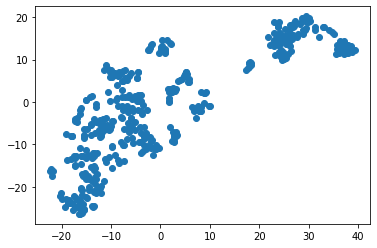

In [55]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [56]:
from sklearn.cluster import KMeans

In [57]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = model.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

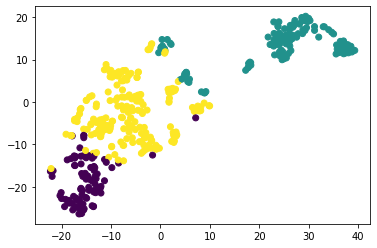

In [58]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [59]:
print(y_train[labels_train == 0].mean())
print(y_train[labels_train == 1].mean())
print(y_train[labels_train == 2].mean())

price    27.788372
dtype: float64
price    16.165354
dtype: float64
price    24.958115
dtype: float64


In [60]:
_crim = X_train['CRIM']
print(_crim[labels_train == 0].mean())
print(_crim[labels_train == 1].mean())
print(_crim[labels_train == 2].mean())

0.07356558139534884
10.797028425196851
0.4216602094240837


## Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [61]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = model.fit_predict(X_test_scaled)

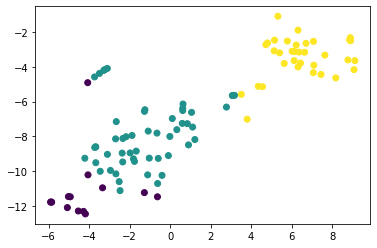

In [62]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [63]:
crim_test = X_test['CRIM']
print(crim_test[labels_test == 0].mean())
print(crim_test[labels_test == 1].mean())
print(crim_test[labels_test == 2].mean())

0.08618571428571427
0.25200716981132076
10.165531142857143
